In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('./'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# Load Data

In [2]:
df = pd.read_csv('./MSFT_chart.csv')
print(df)

                    date  X    open    high      low   close   volume
0       2008-05-05 09:30  5   29.93   30.23   29.900   29.98  5716800
1       2008-05-05 09:35  5   29.98   30.12   29.910   30.11  3360700
2       2008-05-05 09:40  5   30.12   30.12   30.000   30.01  2207200
3       2008-05-05 09:45  5   30.00   30.09   29.950   30.06  2318900
4       2008-05-05 09:50  5   30.05   30.06   29.860   29.90  2785400
...                  ... ..     ...     ...      ...     ...      ...
285437  2022-12-07 15:35  7  244.63  244.86  244.400  244.80   146978
285438  2022-12-07 15:40  7  244.80  244.88  244.520  244.60   128576
285439  2022-12-07 15:45  7  244.58  244.85  244.535  244.67   147893
285440  2022-12-07 15:50  7  244.68  244.83  244.510  244.64   208662
285441  2022-12-07 15:55  7  244.65  244.76  244.170  244.37  4529654

[285442 rows x 7 columns]


# Resampling  

In [3]:
def change_granularity_to_day(dataframe):
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    data_f = dataframe.groupby(pd.Grouper(key='date', freq='D')).agg(
    {"open": "first", "high": "max", "low": "min", "close": "last", "volume": "sum"})
    return data_f.dropna().reset_index()


# StockPrices by year 


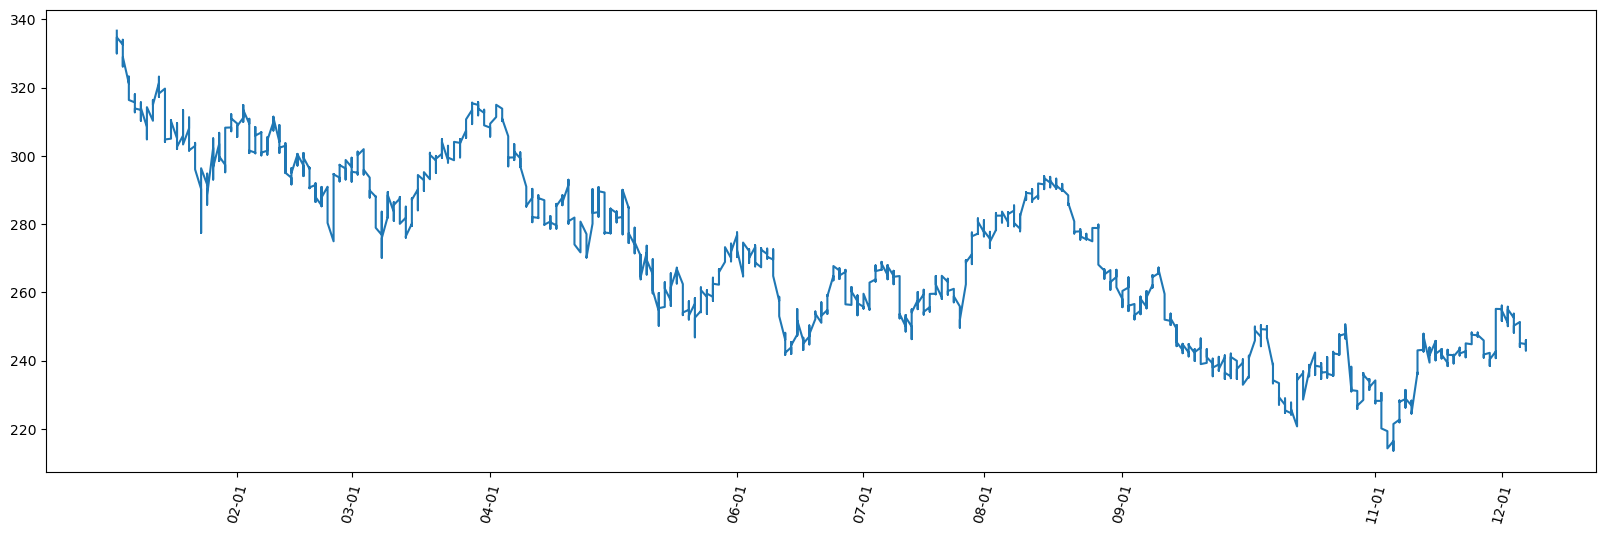

In [4]:
import matplotlib.pyplot as plt 
import calendar

# stock over a year

def yearlyStock(year:str):
     # Filtrer les lignes du DataFrame où la colonne 'Index' est égale à 'ticker'
    df_filtered = df.copy()
    
    # Convertir la colonne 'Date' en format de date
    df_filtered['date'] = pd.to_datetime(df_filtered['date'])
    
    # Filtrer les lignes basées sur l'année
    mask = df_filtered['date'].dt.year == int(year)
    df_yearly = df_filtered.loc[mask]
    
    # Extraire les colonnes 'Date' et 'close' et les retourner en tant que listes
    x_year = df_yearly['date'].dt.strftime('%m-%d').tolist()
    y_year = df_yearly['close'].tolist()
    
    return x_year,y_year
    
# stock over a month

def monthlyStock(year: str, month: str):
    # Filtrer les lignes du DataFrame où la colonne 'Index' est égale à 'ticker'
    df_filtered = df.copy()
    
    # Convertir la colonne 'Date' en format de date
    df_filtered['date'] = pd.to_datetime(df_filtered['date'])
    
    # Filtrer les lignes basées sur l'année et le mois
    mask = (df_filtered['date'].dt.year == int(year)) & (df_filtered['date'].dt.month == int(month))
    
    # Utiliser .loc pour attribuer les valeurs filtrées
    x_month = df_filtered.loc[mask, 'date'].dt.day.tolist()
    y_month = df_filtered.loc[mask, 'close'].tolist()
    
    return x_month, y_month


def get_monthly_ticks(year):
    monthly_ticks = []
    for month in range(1, 13):
        _, last_day = calendar.monthrange(year, month)
        first_day = f"{month:02d}-01"
        monthly_ticks.extend([first_day])
    return monthly_ticks

def drawStockclosePricesGraph(year=None,month = None):
    if year != None:
        x_ticks = get_monthly_ticks(int(year))
        if month != None: 
            x,y = monthlyStock(year,month)
        else:
            x,y = yearlyStock(year)
        x_ticks = list(set(x_ticks) & set(x))
        plt.figure(figsize=(20, 6))
        plt.plot(x,y)
        
        plt.xticks(x_ticks) 
        plt.xticks(rotation=75)
        plt.show()

drawStockclosePricesGraph('2022')

# CandleStick

In [5]:
import plotly.graph_objects as go

"""
def yearlyStockCandleStick(year):
    df['date'] = df['date'].astype(str)
    mask = df['date'].str.startswith(year)
    df_filtered = df.loc[mask].copy()
    df_filtered = change_granularity_to_day(df_filtered)
    date = df_filtered['date']
    open = df_filtered['open']
    high = df_filtered['high']
    low = df_filtered['low']
    close = df_filtered['close']
   
    return date, open, high, low, close, df_filtered


    
def drawStockCandleStick(year, period_average):
    date, open, high, low, close, df_filtered = yearlyStockCandleStick(year)
    
    window_size = period_average
    moving_average = close.rolling(window=window_size, min_periods=1).mean()
    df_filtered.loc[close > moving_average,'trend'] = 'Up'
    df_filtered.loc[close < moving_average,'trend'] = 'Down'
    fig = go.Figure(data=[go.Candlestick(x=date,
                                         open=open,
                                         high=high,
                                         low=low,
                                         close=close)])
    
    fig.add_trace(go.Scatter(x=date, y=moving_average, name=f'Moving Average ({window_size} days)'))
    
    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()
    return df_filtered


df_filtered = drawStockCandleStick('2022',20)
print(df_filtered)
"""

df_filtered = change_granularity_to_day(df)
#df_filtered = df_filtered[(df_filtered['date'] >= pd.to_datetime('2009-01-10'))&(df_filtered['date'] <= pd.to_datetime('2009-01-20'))]
window_size = 20
moving_average = df_filtered['close'].rolling(window=window_size, min_periods=1).mean()
df_filtered.loc[df_filtered['close'] > moving_average,'trend'] = 'Up'
df_filtered.loc[df_filtered['close'] < moving_average,'trend'] = 'Down'
print(df_filtered)
cnd = go.Candlestick(x=df_filtered['date'],open=df_filtered['open'],high=df_filtered['high'],low=df_filtered['low'],close=df_filtered['close'])
fig = go.Figure(data = [cnd])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show() 


           date    open     high       low   close     volume trend
0    2008-05-05   29.93   30.230   28.9900   29.08  100530100   NaN
1    2008-05-06   29.00   29.860   28.9300   29.70   83549200    Up
2    2008-05-07   29.69   30.140   29.0800   29.21   80692200  Down
3    2008-05-08   29.30   29.390   29.0000   29.27   61216900  Down
4    2008-05-09   29.16   29.550   28.9500   29.39   30512600    Up
...         ...     ...      ...       ...     ...        ...   ...
3670 2022-12-01  253.87  256.120  250.9156  254.69   18508619    Up
3671 2022-12-02  249.82  256.060  249.6900  255.02   15659488    Up
3672 2022-12-05  252.01  253.819  248.0600  250.20   16391418    Up
3673 2022-12-06  250.82  251.860  243.7800  245.12   16466831    Up
3674 2022-12-07  244.83  246.160  242.2050  244.37   14905868  Down

[3675 rows x 7 columns]


# CandleStick pattern recognition

In [6]:
def bodyandShadowandRange():
    df_filtered['real_body'] = df_filtered['open'] - df_filtered['close']
    df_filtered['upper_shadow'] = df_filtered['high'] - df_filtered[['open','close']].max(axis=1)
    df_filtered['lower_shadow'] = df_filtered[['open','close']].min(axis=1) - df_filtered['low']
    df_filtered['range'] = df_filtered['high'] - df_filtered['low']

bodyandShadowandRange()


def bullishHarami():
    df_filtered['bullishHarami'] = ((df_filtered['trend'] == 'Down') 
            & (df_filtered.shift(1)['real_body'] > 0) 
            & (df_filtered['real_body'] < 0)
            & (df_filtered.shift(1)['close'] < df_filtered['open'])
            & (df_filtered.shift(1)['open'] > df_filtered['close'])
            & (abs(df_filtered.shift(1)['real_body'])/df_filtered.shift(1)['range'] > 0.6)
            )
    
            
bullishHarami()

    
def bullishEngulfing():
    df_filtered['bullishEngulfing'] = ((df_filtered['trend'] == 'Down') 
            & (df_filtered.shift(1)['real_body'] > 0) 
            & (df_filtered['real_body'] < 0)
            & (df_filtered.shift(1)['close'] > df_filtered['open'])
            & (df_filtered.shift(1)['open'] < df_filtered['close'])
            & (abs(df_filtered['real_body'])/df_filtered['range'] > 0.6)
            )
    
bullishEngulfing()


def bullishDoji():
    df_filtered['bullishDoji'] = ((df_filtered['trend'] == 'Down') 
            & (df_filtered.shift(1)['real_body'] > 0) 
            & (df_filtered.shift(1)['low'] > df_filtered['low'])
            & (df_filtered['high'] - df_filtered['close'] > 3* abs(df_filtered['real_body']))
            & (df_filtered['open'] - df_filtered['low'] < (df_filtered['high'] - df_filtered['close'])/3)
            & (abs(df_filtered.shift(1)['real_body'])/df_filtered.shift(1)['range'] > 0.6)
            )
bullishDoji()


def hammer():
    df_filtered['hammer'] = ((df_filtered['trend'] == 'Down') 
            & (df_filtered.shift(1)['real_body'] > 0) 
            & (df_filtered.shift(1)['low'] > df_filtered['low'])
            & (df_filtered['lower_shadow']  > 2* abs(df_filtered['real_body']))
            & (df_filtered['upper_shadow'] < 0.3 * abs(df_filtered['real_body']))
            )
hammer()

def morningstar():
    df_filtered['morningstar'] = ((df_filtered['trend'] == 'Down') 
            & (df_filtered.shift(2)['real_body'] > 0) 
            & (df_filtered['real_body'] < 0)
            & (abs(df_filtered.shift(2)['real_body'])/df_filtered.shift(2)['range'] > 0.6)
            & (df_filtered.shift(1)['open'] < df_filtered.shift(2)['close'])
            & (df_filtered['open'] > df_filtered.shift(1)['close'])
            & (abs(df_filtered.shift(1)['real_body'])/df_filtered.shift(1)['range']< 0.3)
            & (df_filtered.shift(1)['real_body'] < abs(df_filtered.shift(2)['real_body']))
            & (df_filtered.shift(1)['real_body'] < abs(df_filtered['real_body']))
            & (df_filtered.shift(1)['low'] < df_filtered['low'])
            & (df_filtered.shift(1)['low'] < df_filtered.shift(2)['low'])
            & (df_filtered.shift(1)['high'] < df_filtered.shift(2)['open'])
            & (df_filtered.shift(1)['high'] < df_filtered['close'])
            )
morningstar()

def bearishHarami():
    df_filtered['bearishHarami'] = ((df_filtered['trend'] == 'Up') 
            & (df_filtered.shift(1)['real_body'] < 0) 
            & (df_filtered['real_body'] > 0)
            & (abs(df_filtered.shift(1)['real_body'])/df_filtered.shift(1)['range'] > 0.6)
            & (df_filtered.shift(1)['open'] < df_filtered.shift(2)['close'])
            & (df_filtered['close'] > df_filtered.shift(1)['open'])
            & (df_filtered['open'] < df_filtered.shift(1)['close'])
            )

bearishHarami()


def hangingMan():
    df_filtered['hangingMan'] = ((df_filtered['trend'] == 'Up') 
            & (df_filtered.shift(1)['real_body'] < 0) 
            & (abs(df_filtered.shift(1)['real_body'])/df_filtered.shift(1)['range'] > 0.6)
            & (df_filtered['high'] < df_filtered.shift(1)['high'])
            & (df_filtered['lower_shadow'] > 2 * abs(df_filtered.shift(1)['real_body']))
            & (df_filtered['upper_shadow'] > 0.3 * abs(df_filtered.shift(1)['real_body']))
            )

hangingMan()

def bearishEngulfing():
    df_filtered['bearishEngulfing'] = ((df_filtered['trend'] == 'Up') 
            & (df_filtered.shift(1)['real_body'] < 0) 
            & (df_filtered['real_body'] > 0)
            & (abs(df_filtered['real_body'])/df_filtered['range'] > 0.6)
            & (df_filtered[['open','close']].min(axis=1) < df_filtered.shift(1)[['open','close']].min(axis=1))
            & (df_filtered[['open','close']].max(axis=1) < df_filtered.shift(1)[['open','close']].max(axis=1))
            )
bearishEngulfing()

def eveningStar():
    df_filtered['eveningStar'] = ((df_filtered['trend'] == 'Up') 
            & (df_filtered.shift(2)['real_body'] < 0)
            & (df_filtered['real_body'] > 0)
            & (abs(df_filtered.shift(2)['real_body'])/df_filtered.shift(2)['range'] > 0.6)
            & (df_filtered.shift(1)['open'] > df_filtered.shift(2)['close'])
            & (df_filtered['open'] < df_filtered.shift(1)['close'])
            & (abs(df_filtered.shift(1)['real_body'])/df_filtered.shift(1)['range'] < 0.3)
            & (df_filtered.shift(1)['real_body']< abs(df_filtered.shift(2)['real_body']))
            & (df_filtered.shift(1)['real_body']< abs(df_filtered['real_body']))
            & (df_filtered.shift(1)['high'] > df_filtered['high'])
            & (df_filtered.shift(1)['high'] > df_filtered.shift(2)['high'])
            & (df_filtered.shift(1)['low'] > df_filtered.shift(2)['open'])
            & (df_filtered.shift(1)['low'] > df_filtered['close'])
            )
    
eveningStar()

def gravestoneDoji():
    df_filtered['gravestoneDoji'] = ((df_filtered['trend'] == 'Up') 
            & (df_filtered.shift(1)['real_body'] < 0)
            & (abs(df_filtered.shift(1)['real_body'])/df_filtered.shift(1)['range'] > 0.6)
            & (df_filtered['high'] > df_filtered.shift(1)['high'])
            & (df_filtered['high'] - df_filtered['close'] > 3* abs(df_filtered['real_body']))
            & (df_filtered['open'] - df_filtered['low'] < (df_filtered['high'] - df_filtered['close'])/3)                        
            )
    
gravestoneDoji()

#print(df_filtered[df_filtered['bullishEngulfing']].count()/len(df_filtered))
print(df_filtered[df_filtered['hammer']]['date'])

138    2008-11-18
177    2009-01-15
526    2010-06-08
643    2010-11-22
742    2011-04-14
1416   2013-12-18
1518   2014-05-16
1819   2015-07-28
1953   2016-02-08
2327   2017-08-02
2510   2018-04-25
2784   2019-05-29
2839   2019-08-15
2856   2019-09-10
3035   2020-05-27
3454   2022-01-24
Name: date, dtype: datetime64[ns]


# Anticipation of direction using patterns vs. actual direction 

In [7]:
def patternAnticipation():
    patterns = ['bullishHarami','bullishEngulfing','bullishDoji','hammer','morningstar'
                ,'bearishHarami','hangingMan','bearishEngulfing','eveningStar','gravestoneDoji']
    for pattern_name in patterns:
        length = len(df_filtered[(df_filtered[pattern_name])])
        if length > 0:
            ratio = len(df_filtered[(df_filtered[pattern_name])&(df_filtered.shift(-1)['trend'] == 'Up')])/len(df_filtered[(df_filtered[pattern_name])])
            print(f'ratio of bullish reversal for {pattern_name} pattern est : {ratio}')
        


patternAnticipation()


ratio of bullish reversal for bullishHarami pattern est : 0.19607843137254902
ratio of bullish reversal for bullishEngulfing pattern est : 0.4166666666666667
ratio of bullish reversal for bullishDoji pattern est : 0.6
ratio of bullish reversal for hammer pattern est : 0.1875
ratio of bullish reversal for morningstar pattern est : 0.0
ratio of bullish reversal for bearishHarami pattern est : 0.9354838709677419
ratio of bullish reversal for bearishEngulfing pattern est : 0.8571428571428571
ratio of bullish reversal for eveningStar pattern est : 1.0
ratio of bullish reversal for gravestoneDoji pattern est : 0.9411764705882353


In [8]:
df_filtered.shift(-1)[df_filtered['hammer']][['date','trend']]

,date,trend
138,2008-11-19,Down
177,2009-01-16,Up
526,2010-06-09,Down
643,2010-11-23,Down
742,2011-04-15,Down
1416,2013-12-19,Down
1518,2014-05-19,Down
1819,2015-07-29,Up
1953,2016-02-09,Down
2327,2017-08-03,Down
